In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv('BRFSS__Table_of_Tobacco_Use.csv')
df.columns

C:\Users\aravi\AppData\Local\Temp\ipykernel_5632\4011417078.py:1: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('BRFSS__Table_of_Tobacco_Use.csv')


Index(['Year', 'Locationabbr', 'Locationdesc', 'Class', 'Topic', 'Question',
       'Response', 'Break_Out', 'Break_Out_Category', 'Sample_Size',
       'Data_value', 'Confidence_limit_Low', 'Confidence_limit_High',
       'Display_order', 'Data_value_unit', 'Data_value_type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'DataSource',
       'ClassId', 'TopicId', 'LocationID', 'BreakoutID', 'BreakOutCategoryID',
       'QuestionID', 'ResponseID', 'GeoLocation'],
      dtype='object')

In [47]:
df['Locationdesc']=df['Locationdesc'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138048 entries, 0 to 138047
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Year                        138048 non-null  int64  
 1   Locationabbr                138048 non-null  object 
 2   Locationdesc                138048 non-null  object 
 3   Class                       138048 non-null  object 
 4   Topic                       138048 non-null  object 
 5   Question                    138048 non-null  object 
 6   Response                    138048 non-null  object 
 7   Break_Out                   138048 non-null  object 
 8   Break_Out_Category          138048 non-null  object 
 9   Sample_Size                 138048 non-null  int64  
 10  Data_value                  109167 non-null  float64
 11  Confidence_limit_Low        108963 non-null  float64
 12  Confidence_limit_High       108963 non-null  float64
 13  Display_order 

In [48]:
df=df.filter(['Year', 'Locationabbr', 'Locationdesc','Topic','Response','Break_Out_Category','Break_Out','Sample_Size',
       'Data_value', 'Confidence_limit_Low', 'Confidence_limit_High','GeoLocation'])
df.head()

,Year,Locationabbr,Locationdesc,Topic,Response,Break_Out_Category,Break_Out,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,GeoLocation
0,2019,AK,Alaska,Smokeless Tobacco,Not at all,Race/Ethnicity,Hispanic,68,100.0,100.0,100.0,"(64.84507995700051, -147.72205903599973)"
1,2019,DC,District of Columbia,Smokeless Tobacco,Every day,Race/Ethnicity,"Other, non-Hispanic",0,NaN,NaN,NaN,"(38.89037138500049, -77.03196112699965)"
2,2019,ME,Maine,Smokeless Tobacco,Every day,Race/Ethnicity,"Native Hawaiian or other Pacific Islander, non...",0,NaN,NaN,NaN,"(45.254228894000505, -68.98503133599962)"
3,2019,NV,Nevada,Smokeless Tobacco,Every day,Age Group,65+,8,NaN,NaN,NaN,"(39.493240390000494, -117.07184056399967)"
4,2020,NH,New Hampshire,Smokeless Tobacco,Every day,Race/Ethnicity,"Black, non-Hispanic",0,NaN,NaN,NaN,"(43.65595011300047, -71.50036091999965)"


In [49]:
grouped_df = df.groupby(['Year', 'Locationdesc', 'Sample_Size', 'Break_Out_Category'])['Break_Out'].apply(lambda x: ', '.join(x)).reset_index()
grouped_df.tail(5)

,Year,Locationdesc,Sample_Size,Break_Out_Category,Break_Out
121385,2022,Wyoming,2216,Overall,Overall
121386,2022,Wyoming,3046,Race/Ethnicity,"White, non-Hispanic"
121387,2022,Wyoming,3303,Race/Ethnicity,"White, non-Hispanic"
121388,2022,Wyoming,3340,Overall,Overall
121389,2022,Wyoming,3635,Overall,Overall


In [50]:
pivot_df = grouped_df.pivot_table(index=['Year', 'Locationdesc', 'Sample_Size'], columns='Break_Out_Category', values='Break_Out', aggfunc='first').reset_index()
pivot_df

Break_Out_Category,Year,Locationdesc,Sample_Size,Age Group,Education Attained,Gender,Household Income,Overall,Race/Ethnicity
0,2011,Alabama,5,NaN,NaN,NaN,NaN,NaN,"Multiracial, non-Hispanic"
1,2011,Alabama,7,NaN,NaN,NaN,NaN,NaN,Hispanic
2,2011,Alabama,10,NaN,NaN,NaN,NaN,NaN,"Other, non-Hispanic"
3,2011,Alabama,12,NaN,NaN,NaN,NaN,NaN,"Multiracial, non-Hispanic"
4,2011,Alabama,17,NaN,NaN,NaN,NaN,NaN,"Multiracial, non-Hispanic"
...,...,...,...,...,...,...,...,...,...
104864,2022,Wyoming,2216,NaN,NaN,NaN,NaN,Overall,NaN
104865,2022,Wyoming,3046,NaN,NaN,NaN,NaN,NaN,"White, non-Hispanic"
104866,2022,Wyoming,3303,NaN,NaN,NaN,NaN,NaN,"White, non-Hispanic"
104867,2022,Wyoming,3340,NaN,NaN,NaN,NaN,Overall,NaN


In [51]:
merged_df = pd.merge(df, pivot_df, on=['Year', 'Locationdesc', 'Sample_Size'], how='left')
merged_df

,Year,Locationabbr,Locationdesc,Topic,Response,Break_Out_Category,Break_Out,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,GeoLocation,Age Group,Education Attained,Gender,Household Income,Overall,Race/Ethnicity
0,2019,AK,Alaska,Smokeless Tobacco,Not at all,Race/Ethnicity,Hispanic,68,100.0,100.0,100.0,"(64.84507995700051, -147.72205903599973)",NaN,Less than H.S.,NaN,NaN,NaN,"Hispanic, American Indian or Alaskan Native, n..."
1,2019,DC,District of Columbia,Smokeless Tobacco,Every day,Race/Ethnicity,"Other, non-Hispanic",0,NaN,NaN,NaN,"(38.89037138500049, -77.03196112699965)",18-24,NaN,NaN,"Less than $15,000",NaN,"Other, non-Hispanic, Native Hawaiian or other ..."
2,2019,ME,Maine,Smokeless Tobacco,Every day,Race/Ethnicity,"Native Hawaiian or other Pacific Islander, non...",0,NaN,NaN,NaN,"(45.254228894000505, -68.98503133599962)",NaN,NaN,NaN,NaN,NaN,"Native Hawaiian or other Pacific Islander, non..."
3,2019,NV,Nevada,Smokeless Tobacco,Every day,Age Group,65+,8,NaN,NaN,NaN,"(39.493240390000494, -117.07184056399967)","65+, 25-34",NaN,NaN,NaN,NaN,"Other, non-Hispanic, Multiracial, non-Hispanic"
4,2020,NH,New Hampshire,Smokeless Tobacco,Every day,Race/Ethnicity,"Black, non-Hispanic",0,NaN,NaN,NaN,"(43.65595011300047, -71.50036091999965)",NaN,NaN,NaN,NaN,NaN,"Black, non-Hispanic, Native Hawaiian or other ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138043,2017,MD,Maryland,Smoker Status,Smoke some days,Gender,Male,205,5.0,4.0,6.0,"(39.29058096400047, -76.60926011099963)",NaN,NaN,Male,NaN,NaN,NaN
138044,2016,HI,Hawaii,Smokeless Tobacco,Some days,Education Attained,H.S. or G.E.D.,29,1.2,0.7,1.7,"(21.304850435000446, -157.85774940299973)",NaN,H.S. or G.E.D.,Female,NaN,NaN,Hispanic
138045,2020,LA,Louisiana,Smokeless Tobacco,Not at all,Education Attained,H.S. or G.E.D.,1228,93.8,92.2,95.3,"(31.31266064400046, -92.44568007099969)",NaN,H.S. or G.E.D.,NaN,NaN,NaN,NaN
138046,2019,RI,Rhode Island,Smoker Status,Smoke some days,Age Group,35-44,33,5.4,2.9,7.9,"(41.70828019300046, -71.52247031399963)",35-44,NaN,NaN,NaN,NaN,Hispanic


In [52]:
merged_df.dropna(axis=0,thresh=13,inplace=True)

In [53]:
merged_df.drop(columns=['Overall','Break_Out_Category','Break_Out'],inplace=True)

In [54]:
merged_df[['Age Group','Education Attained','Gender','Household Income','Race/Ethnicity']]= merged_df[['Age Group','Education Attained','Gender','Household Income','Race/Ethnicity']].fillna('Overall')
merged_df[['Age Group','Education Attained','Gender','Household Income','Race/Ethnicity']]

,Age Group,Education Attained,Gender,Household Income,Race/Ethnicity
0,Overall,Less than H.S.,Overall,Overall,"Hispanic, American Indian or Alaskan Native, n..."
7,"45-54, 65+",Overall,Female,"$15,000-$24,999",Hispanic
12,18-24,Less than H.S.,Overall,"$15,000-$24,999","Black, non-Hispanic"
22,25-34,Less than H.S.,Overall,"Less than $15,000, $25,000-$34,999, $35,000-$4...",Hispanic
46,Overall,College graduate,Overall,Overall,Overall
...,...,...,...,...,...
138043,Overall,Overall,Male,Overall,Overall
138044,Overall,H.S. or G.E.D.,Female,Overall,Hispanic
138045,Overall,H.S. or G.E.D.,Overall,Overall,Overall
138046,35-44,Overall,Overall,Overall,Hispanic


In [55]:
merged_df.reset_index(inplace=True)
merged_df

,index,Year,Locationabbr,Locationdesc,Topic,Response,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,GeoLocation,Age Group,Education Attained,Gender,Household Income,Race/Ethnicity
0,0,2019,AK,Alaska,Smokeless Tobacco,Not at all,68,100.0,100.0,100.0,"(64.84507995700051, -147.72205903599973)",Overall,Less than H.S.,Overall,Overall,"Hispanic, American Indian or Alaskan Native, n..."
1,7,2019,WI,Wisconsin,Smokeless Tobacco,Some days,8,NaN,NaN,NaN,"(44.39319117400049, -89.81637074199966)","45-54, 65+",Overall,Female,"$15,000-$24,999",Hispanic
2,12,2019,AK,Alaska,Smokeless Tobacco,Some days,11,NaN,NaN,NaN,"(64.84507995700051, -147.72205903599973)",18-24,Less than H.S.,Overall,"$15,000-$24,999","Black, non-Hispanic"
3,22,2019,AZ,Arizona,Smokeless Tobacco,Every day,16,NaN,NaN,NaN,"(34.865970280000454, -111.76381127699972)",25-34,Less than H.S.,Overall,"Less than $15,000, $25,000-$34,999, $35,000-$4...",Hispanic
4,46,2019,AL,Alabama,Smoker Status,Smoke everyday,119,5.2,4.1,6.3,"(32.84057112200048, -86.63186076199969)",Overall,College graduate,Overall,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111904,138043,2017,MD,Maryland,Smoker Status,Smoke some days,205,5.0,4.0,6.0,"(39.29058096400047, -76.60926011099963)",Overall,Overall,Male,Overall,Overall
111905,138044,2016,HI,Hawaii,Smokeless Tobacco,Some days,29,1.2,0.7,1.7,"(21.304850435000446, -157.85774940299973)",Overall,H.S. or G.E.D.,Female,Overall,Hispanic
111906,138045,2020,LA,Louisiana,Smokeless Tobacco,Not at all,1228,93.8,92.2,95.3,"(31.31266064400046, -92.44568007099969)",Overall,H.S. or G.E.D.,Overall,Overall,Overall
111907,138046,2019,RI,Rhode Island,Smoker Status,Smoke some days,33,5.4,2.9,7.9,"(41.70828019300046, -71.52247031399963)",35-44,Overall,Overall,Overall,Hispanic


In [56]:
df=merged_df
df[['Confidence_limit_High','Confidence_limit_Low']]=df[['Confidence_limit_High','Confidence_limit_Low']].fillna(0)
df['Confidence_limit_High']=df['Confidence_limit_High'].astype(float)
df['Confidence_limit_Low']=df['Confidence_limit_Low'].astype(float)
df.describe()

,index,Year,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High
count,111909.000000,111909.000000,111909.000000,108963.000000,111909.000000,111909.000000
mean,75138.469980,2016.801812,766.759188,38.419717,34.364709,40.440061
std,40172.800635,3.366696,1496.967995,33.805081,33.556384,34.482146
min,0.000000,2011.000000,0.000000,0.100000,0.000000,0.000000
25%,38309.000000,2014.000000,70.000000,8.400000,5.100000,9.600000
50%,82093.000000,2017.000000,229.000000,24.000000,18.900000,27.000000
75%,110070.000000,2020.000000,768.000000,71.900000,64.900000,75.700000
max,138047.000000,2022.000000,35487.000000,100.000000,100.000000,100.000000


In [57]:
df=df[(df['Sample_Size']>100) & (df['Confidence_limit_High']-df['Confidence_limit_Low']<40)&(df['Confidence_limit_High']!=0) & (df['Confidence_limit_Low']!=0)&(df['Education Attained']!='College Graduate')]
df=df.drop(columns='index')
df.reset_index(drop=True,inplace=True)
df.head()

,Year,Locationabbr,Locationdesc,Topic,Response,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,GeoLocation,Age Group,Education Attained,Gender,Household Income,Race/Ethnicity
0,2019,AL,Alabama,Smoker Status,Smoke everyday,119,5.2,4.1,6.3,"(32.84057112200048, -86.63186076199969)",Overall,College graduate,Overall,Overall,Overall
1,2022,AL,Alabama,Current Smoker Status,No,163,90.1,84.6,95.6,"(32.84057112200048, -86.63186076199969)",18-24,Overall,Overall,Overall,Overall
2,2022,AL,Alabama,Current Smoker Status,No,341,80.5,75.1,85.9,"(32.84057112200048, -86.63186076199969)",25-34,Overall,Overall,Overall,Overall
3,2022,AL,Alabama,Current Smoker Status,No,394,81.5,77.4,85.6,"(32.84057112200048, -86.63186076199969)",35-44,Overall,Overall,Overall,Overall
4,2022,AL,Alabama,Current Smoker Status,Yes,103,17.7,13.9,21.4,"(32.84057112200048, -86.63186076199969)",45-54,Overall,Overall,"Less than $15,000",Overall


In [58]:
for index, row in df.iterrows():
    if ',' in row['Age Group']:
        df.at[index,'Age Group']='Overall'

for index, row in df.iterrows():
    if ',' in row['Education Attained']:
        df.at[index,'Education Attained']='Overall'

for index, row in df.iterrows():
    if ',' in row['Gender']:
        df.at[index,'Gender']='Overall'

for index, row in df.iterrows():
    if row['Household Income'] not in ['Overall', '$100,000-$199,999', '$50,000-$99,999',
       '$35,000-$49,999','$25,000-$34,999', '$15,000-$24,999', 'Less than $15,000',
       '$200,000+']:
        df.at[index,'Household Income']='Overall'

In [59]:
def convertToGeoLocation(x: str)->(float,float):
    t=[]
    for i in x[1:-1].split(','):
        t.append(float(i))
    return tuple(t)
df['GeoLocation']=df['GeoLocation'].apply(convertToGeoLocation)

In [60]:
df.dropna(inplace=True)
df.reset_index()

,index,Year,Locationabbr,Locationdesc,Topic,Response,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High,GeoLocation,Age Group,Education Attained,Gender,Household Income,Race/Ethnicity
0,0,2019,AL,Alabama,Smoker Status,Smoke everyday,119,5.2,4.1,6.3,"(32.84057112200048, -86.63186076199969)",Overall,College graduate,Overall,Overall,Overall
1,1,2022,AL,Alabama,Current Smoker Status,No,163,90.1,84.6,95.6,"(32.84057112200048, -86.63186076199969)",18-24,Overall,Overall,Overall,Overall
2,2,2022,AL,Alabama,Current Smoker Status,No,341,80.5,75.1,85.9,"(32.84057112200048, -86.63186076199969)",25-34,Overall,Overall,Overall,Overall
3,3,2022,AL,Alabama,Current Smoker Status,No,394,81.5,77.4,85.6,"(32.84057112200048, -86.63186076199969)",35-44,Overall,Overall,Overall,Overall
4,4,2022,AL,Alabama,Current Smoker Status,Yes,103,17.7,13.9,21.4,"(32.84057112200048, -86.63186076199969)",45-54,Overall,Overall,"Less than $15,000",Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76239,76239,2015,NC,North Carolina,Smoker Status,Former smoker,529,26.2,23.9,28.6,"(35.466220975, -79.159250463)",Overall,Some post-H.S.,Overall,Overall,Overall
76240,76240,2019,AL,Alabama,Current Smoker Status,No,1600,81.6,79.4,83.8,"(32.84057112200048, -86.63186076199969)",Overall,Some post-H.S.,Overall,Overall,Overall
76241,76241,2018,DC,District of Columbia,Current Smoker Status,No,1488,78.0,75.4,80.6,"(38.89037138500049, -77.03196112699965)",Overall,Overall,Overall,Overall,"Black, non-Hispanic"
76242,76242,2017,MD,Maryland,Smoker Status,Smoke some days,205,5.0,4.0,6.0,"(39.29058096400047, -76.60926011099963)",Overall,Overall,Male,Overall,Overall


In [61]:
pd.pivot_table(df,values='Data_value',index=['Topic','Response'],aggfunc=['count'])

count
                                      Data_value
Topic                 Response                  
Current Smoker Status No                   13944
                      Yes                  10769
Smokeless Tobacco     Every day             1189
                      Not at all           11863
                      Some days              651
Smoker Status         Former smoker        11373
                      Never smoked         13490
                      Smoke everyday        9023
                      Smoke some days       3942

In [62]:
pd.pivot_table(df,values=['Confidence_limit_Low','Confidence_limit_High','Data_value'],index=['Topic','Response'],aggfunc='mean')

Confidence_limit_High  \
Topic                 Response                                 
Current Smoker Status No                           84.837055   
                      Yes                          21.839772   
Smokeless Tobacco     Every day                     4.741548   
                      Not at all                   97.519658   
                      Some days                     2.990937   
Smoker Status         Former smoker                28.313989   
                      Never smoked                 61.917324   
                      Smoke everyday               15.997972   
                      Smoke some days               6.299087   

                                       Confidence_limit_Low  Data_value  
Topic                 Response                                           
Current Smoker Status No                          78.044019   81.441903  
                      Yes                         16.260851   19.050683  
Smokeless Tobacco     Every day                    3.176619    3.960892  
                      Not at all                  94.014128   95.785594  
                      Some days                    1.881567    2.435637  
Smoker Status         Former smoker               22.440438   25.377139  
                      Never smoked                54.018933   57.968332  
                      Smoke everyday              11.499889   13.748742  
                      Smoke some days              4.129554    5.213927

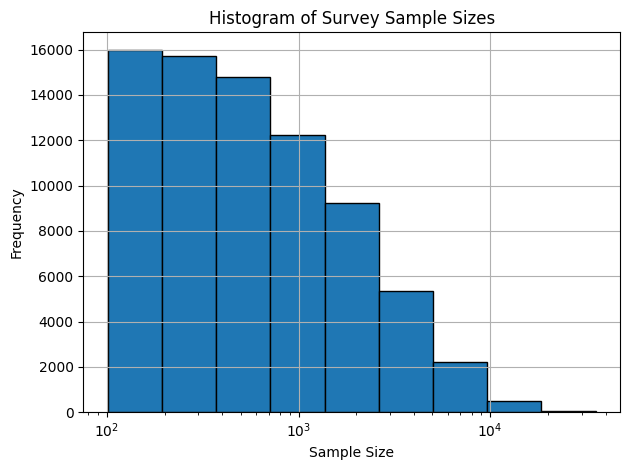

In [93]:
bin_edges = np.logspace(np.log10(min(df['Sample_Size'])), np.log10(max(df['Sample_Size'])), 10)
plt.hist(df['Sample_Size'], bins=bin_edges, edgecolor='black') 
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('Frequency')
plt.title('Histogram of Survey Sample Sizes')
plt.grid(True)
plt.tight_layout()
plt.show()

Based on Gender

In [63]:
pd.crosstab(df['Gender'],[df['Topic'],df['Response']])

Topic    Current Smoker Status       Smokeless Tobacco                       \
Response                    No   Yes         Every day Not at all Some days   
Gender                                                                        
Female                     683   679                 5        553         4   
Male                       667   692               328        561       185   
Overall                  12594  9398               856      10749       462   

Topic    Smoker Status                                              
Response Former smoker Never smoked Smoke everyday Smoke some days  
Gender                                                              
Female             674          678            660             509  
Male               692          686            695             515  
Overall          10007        12126           7668            2918

In [64]:
pd.pivot_table(df,values='Data_value',index=['Gender','Topic','Response'],aggfunc='mean')

Data_value
Gender  Topic                 Response                   
Female  Current Smoker Status No                84.061201
                              Yes               16.078645
        Smokeless Tobacco     Every day          2.120000
                              Not at all        98.775045
                              Some days          1.825000
        Smoker Status         Former smoker     21.656231
                              Never smoked      62.786578
                              Smoke everyday    11.424848
                              Smoke some days    4.443811
Male    Current Smoker Status No                80.881259
                              Yes               19.350578
        Smokeless Tobacco     Every day          5.510061
                              Not at all        92.713904
                              Some days          3.431892
        Smoker Status         Former smoker     27.695665
                              Never smoked      53.178426
                              Smoke everyday    13.537266
                              Smoke some days    5.851845
Overall Current Smoker Status No                81.329546
                              Yes               19.243328
        Smokeless Tobacco     Every day          3.378037
                              Not at all        95.792111
                              Some days          2.041991
        Smoker Status         Former smoker     25.467423
                              Never smoked      57.969908
                              Smoke everyday    13.967932
                              Smoke some days    5.235675

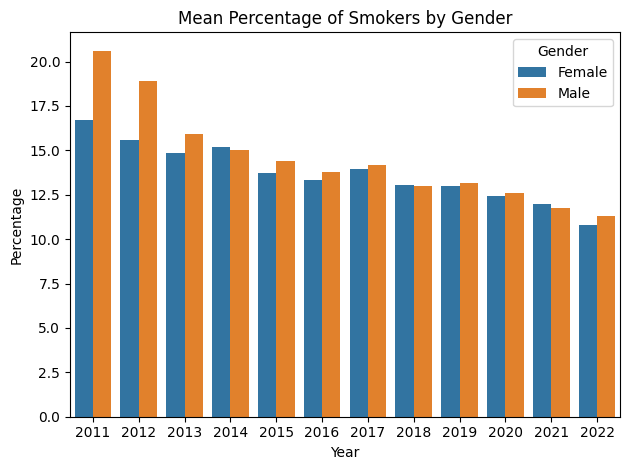

In [65]:
gen_df=df[(((df['Topic']=='Smokeless Tobacco')&(df['Response']=='Every day'))|((df['Topic']=='Current Smoker Status')&(df['Response']=='Yes'))| ((df['Topic']=='Smoker Status')&(df['Response']=='Smoke everyday')))&(df['Gender']!='Overall')][['Year','Gender','Data_value']]
smoker_gender=gen_df.groupby(['Gender','Year']).agg('mean').reset_index()
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=smoker_gender,x='Year',y='Data_value',hue='Gender')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Mean Percentage of Smokers by Gender')

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

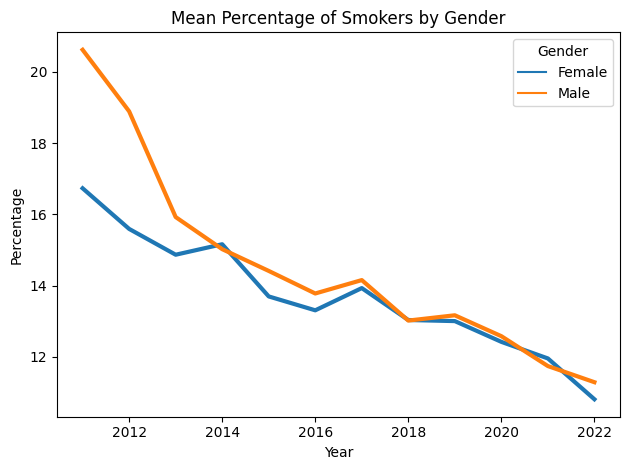

In [66]:
sns.lineplot(data=smoker_gender,x='Year',y='Data_value',hue='Gender',linewidth=3)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Mean Percentage of Smokers by Gender')

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

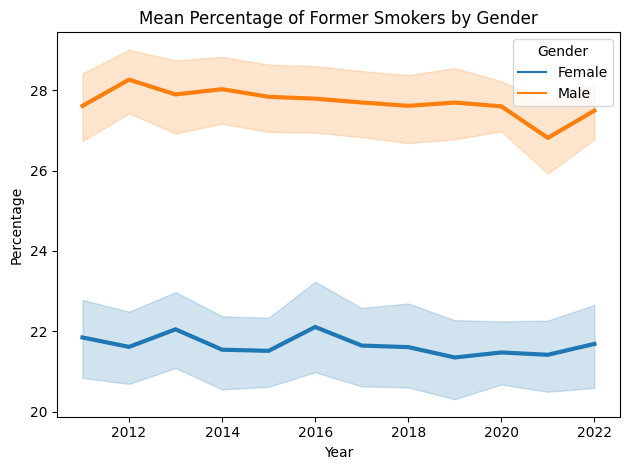

In [67]:
former_gender=df[((df['Topic']=='Smoker Status')&(df['Response']=='Former smoker'))&(df['Gender']!='Overall')][['Year','Gender','Data_value']]
sns.lineplot(data=former_gender,x='Year',y='Data_value',hue='Gender',linewidth=3)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Mean Percentage of Former Smokers by Gender')

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

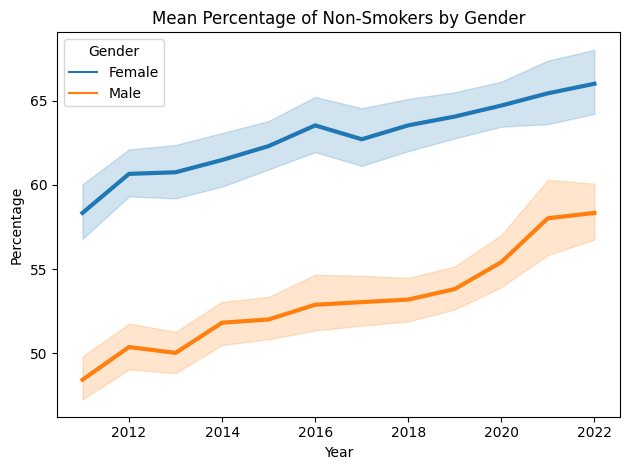

In [68]:
former_gender=df[((df['Topic']=='Smoker Status')&(df['Response']=='Never smoked'))&(df['Gender']!='Overall')][['Year','Gender','Data_value']]
sns.lineplot(data=former_gender,x='Year',y='Data_value',hue='Gender',linewidth=3)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Mean Percentage of Non-Smokers by Gender')

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Based on Age

In [69]:
order=['Less than $15,000','$15,000-$24,999','$25,000-$34,999','$35,000-$49,999','$50,000-$99,999','$100,000-$199,999','$200,000+','Overall']
ageOrder=['18-24', '25-34','35-44', '45-54', '55-64', '65+','Overall']
df['Household Income']=pd.Categorical(df['Household Income'],categories=order,ordered=True)
df['Age Group']=pd.Categorical(df['Age Group'],categories=ageOrder,ordered=True)
df['Age Group'].unique()

['Overall', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
Categories (7, object): ['18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+' < 'Overall']

In [70]:
df[(df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday')].groupby('Age Group').agg('mean')[['Confidence_limit_Low','Data_value','Confidence_limit_High']]


C:\Users\aravi\AppData\Local\Temp\ipykernel_5632\1705933298.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[(df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday')].groupby('Age Group').agg('mean')[['Confidence_limit_Low','Data_value','Confidence_limit_High']]


,Confidence_limit_Low,Data_value,Confidence_limit_High
Age Group,,,
18-24,14.922751,18.230688,21.539153
25-34,16.919222,20.316705,23.718764
35-44,15.425490,18.618768,21.816993
45-54,14.676675,17.490500,20.297286
55-64,13.275802,15.739095,18.204444
65+,7.010422,8.578167,10.144295
Overall,13.512947,15.872640,18.231636


C:\Users\aravi\AppData\Local\Temp\ipykernel_5632\3146069465.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_df=df[(df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday')].groupby(['Year','Age Group']).agg('mean').reset_index()


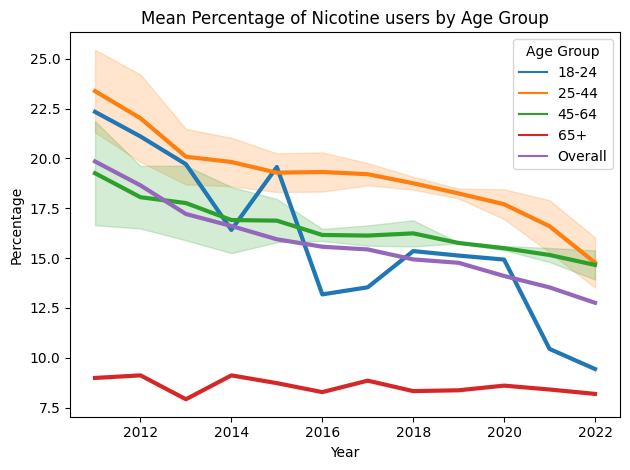

In [71]:
age_df=df[(df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday')].groupby(['Year','Age Group']).agg('mean').reset_index()
table=pd.pivot_table(data=age_df,index='Year',columns='Age Group',values='Data_value',aggfunc='mean')
comb_age_df=age_df
comb_age_df['Age Group'] = age_df['Age Group'].replace({'25-34': '25-44', '35-44': '25-44', '45-54': '45-64', '55-64': '45-64'})
sns.lineplot(data=comb_age_df,x='Year',y='Data_value',hue='Age Group',markers="o",linewidth=3)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Mean Percentage of Nicotine users by Age Group')

plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

C:\Users\aravi\AppData\Local\Temp\ipykernel_5632\3517366913.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_age_df = df[((df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday'))&(df['Age Group'].isin(selected_age_groups))].groupby(['Year','Age Group']).agg('mean').reset_index()


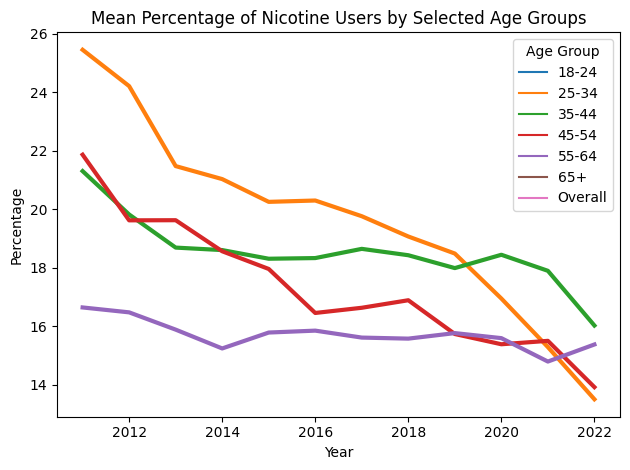

In [72]:
selected_age_groups = ['25-34', '35-44', '45-54', '55-64']
filtered_age_df = df[((df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday'))&(df['Age Group'].isin(selected_age_groups))].groupby(['Year','Age Group']).agg('mean').reset_index()
filtered_age_df = filtered_age_df[filtered_age_df['Age Group'].isin(selected_age_groups)]
sns.lineplot(data=filtered_age_df, x='Year', y='Data_value', hue='Age Group', markers="o", linewidth=3)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Mean Percentage of Nicotine Users by Selected Age Groups')

plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

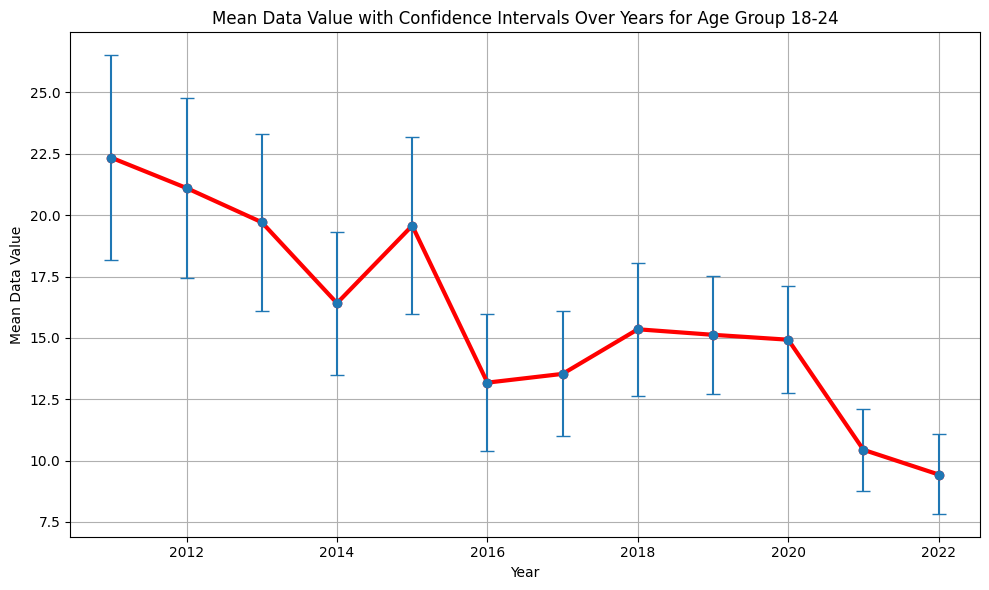

In [73]:
filtered_age_df=df[((df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday'))&(df['Age Group']=='18-24')]
mean_data_value = filtered_age_df.groupby('Year')['Data_value'].mean().reset_index()

# Extract the confidence limits
confidence_low = filtered_age_df.groupby('Year')['Confidence_limit_Low'].mean().values
confidence_high = filtered_age_df.groupby('Year')['Confidence_limit_High'].mean().values

# Plotting the error bar plot
plt.figure(figsize=(10, 6))
plt.errorbar(mean_data_value['Year'], mean_data_value['Data_value'], yerr=[mean_data_value['Data_value'] - confidence_low, confidence_high - mean_data_value['Data_value']], fmt='o', capsize=5)
plt.plot(mean_data_value['Year'], mean_data_value['Data_value'], marker='o', linestyle='-', color='red',linewidth=3, label='Line connecting Mean Data Value')
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Data Value')
plt.title('Mean Data Value with Confidence Intervals Over Years for Age Group 18-24')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
table

Age Group,18-24,25-34,35-44,45-54,55-64,65+,Overall
Year,,,,,,,
2011,22.338710,25.451613,21.307143,21.867593,16.649533,8.983871,19.848969
2012,21.103226,24.210870,19.825243,19.625472,16.481731,9.113684,18.648492
2013,19.708824,21.478723,18.694286,19.629808,15.891429,7.915054,17.211220
2014,16.413043,21.034568,18.609375,18.568932,15.248544,9.112745,16.609010
2015,19.570588,20.256944,18.313750,17.964356,15.792233,8.723711,15.943590
2016,13.176923,20.302778,18.336364,16.460952,15.857273,8.272917,15.568582
2017,13.533333,19.766234,18.651087,16.638462,15.619802,8.849462,15.433100
2018,15.350000,19.073239,18.433333,16.895789,15.584158,8.323656,14.933802
2019,15.125000,18.491045,17.994048,15.741935,15.773000,8.365217,14.762318


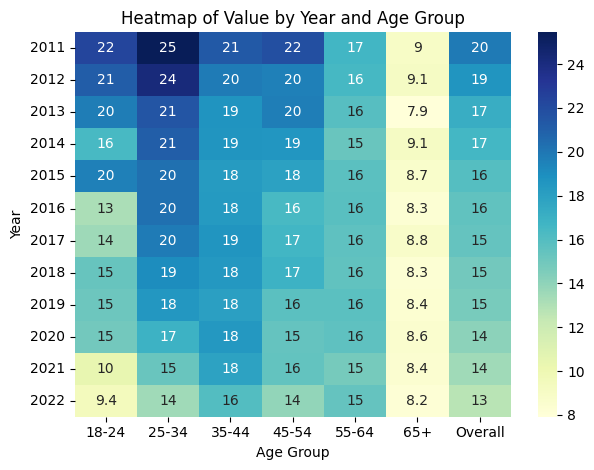

In [75]:
sns.heatmap(table,annot=True,cmap='YlGnBu')
plt.xlabel('Age Group')
plt.ylabel('Year')
plt.title('Heatmap of Value by Year and Age Group')
plt.tight_layout()
plt.show()

In [76]:
edu_df=df[(df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday')]
edu_df_nodf=df[(df['Response']=='No')|(df['Response']=='Never smoked')|(df['Response']=='Not at all')]
table=pd.pivot_table(data=edu_df,index='Household Income',columns='Age Group',values='Data_value',aggfunc='mean')
table

Age Group,18-24,25-34,35-44,45-54,55-64,65+,Overall
Household Income,,,,,,,
"Less than $15,000",27.033333,22.167857,24.651220,23.360000,19.725000,16.042308,26.561283
"$15,000-$24,999",26.309091,18.818750,19.626667,18.403448,18.776923,13.971429,22.234239
"$25,000-$34,999",17.900000,22.247619,21.153333,18.725000,16.718182,10.558333,19.333730
"$35,000-$49,999",NaN,17.966667,19.642308,15.077778,13.957143,11.591667,16.601090
"$50,000-$99,999",NaN,8.550000,11.442857,13.866667,11.757143,11.000000,10.223333
"$100,000-$199,999",NaN,4.100000,15.300000,NaN,NaN,5.850000,7.942857
"$200,000+",NaN,11.700000,19.800000,10.900000,13.800000,9.000000,7.472727
Overall,17.558333,20.372494,18.292729,17.332169,15.642110,8.224204,14.362467


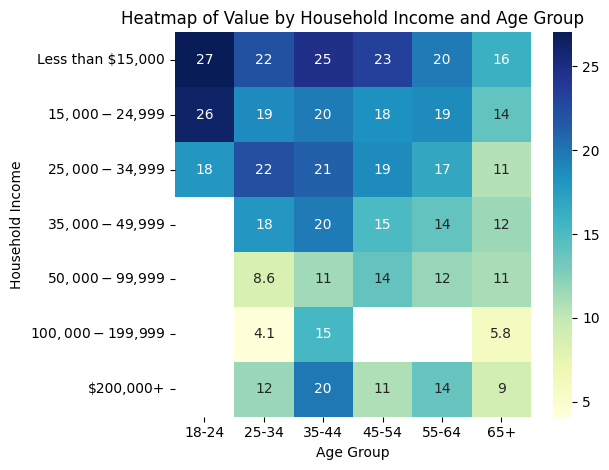

In [77]:
table.drop('Overall',axis=1,inplace=True)
table.drop('Overall',axis=0,inplace=True)
sns.heatmap(table,annot=True,cmap='YlGnBu')
plt.xlabel('Age Group')
plt.ylabel('Household Income')
plt.title('Heatmap of Value by Household Income and Age Group')
plt.tight_layout()
plt.show()

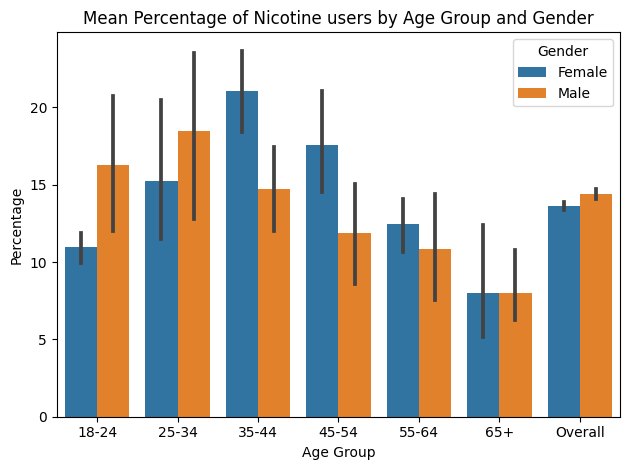

In [78]:
data=df[((df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday'))&(df['Gender']!='Overall')]
sns.barplot(data=data,x='Age Group',y='Data_value',hue='Gender')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Mean Percentage of Nicotine users by Age Group and Gender')

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Based on Education Attained

In [85]:
ndf=df[df['Education Attained']!='College Graduate']

In [86]:
ndf[(ndf['Response']=='Yes')|(ndf['Response']=='Every day')|(ndf['Response']=='Smoke everyday')].groupby('Education Attained').agg('mean')[['Confidence_limit_Low','Data_value','Confidence_limit_High']]

C:\Users\aravi\AppData\Local\Temp\ipykernel_5632\1401396260.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ndf[(ndf['Response']=='Yes')|(ndf['Response']=='Every day')|(ndf['Response']=='Smoke everyday')].groupby('Education Attained').agg('mean')[['Confidence_limit_Low','Data_value','Confidence_limit_High']]


,Confidence_limit_Low,Data_value,Confidence_limit_High
Education Attained,,,
Less than H.S.,21.310388,25.707030,30.105352
H.S. or G.E.D.,15.729365,18.102886,20.479437
Some post-H.S.,12.135955,14.230562,16.323670
Overall,13.425048,15.858045,18.290316


C:\Users\aravi\AppData\Local\Temp\ipykernel_5632\3145426294.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_df=df[((df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday'))].groupby(['Year','Education Attained']).agg('mean').reset_index()


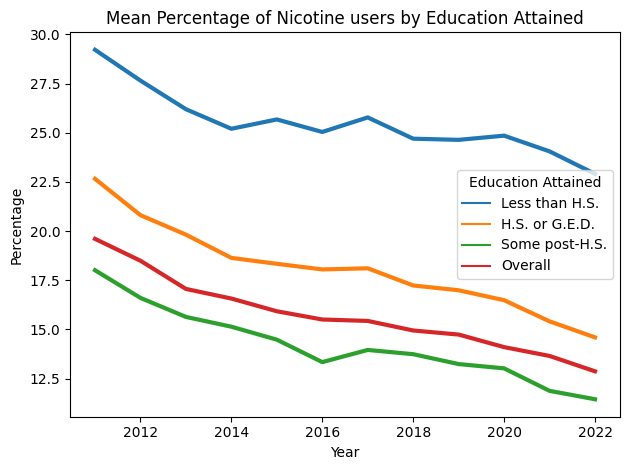

In [87]:
eduorder=['Less than H.S.','H.S. or G.E.D.','Some post-H.S.','Overall']
df['Education Attained']=pd.Categorical(df['Education Attained'],ordered=True,categories=eduorder)
age_df=df[((df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday'))].groupby(['Year','Education Attained']).agg('mean').reset_index()

sns.lineplot(data=age_df,x='Year',y='Data_value',hue='Education Attained',linewidth=3)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Mean Percentage of Nicotine users by Education Attained')

plt.legend(title='Education Attained')
plt.tight_layout()
plt.show()

In [82]:
table=pd.pivot_table(data=df[((df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday'))],index='Household Income',columns='Education Attained',values='Data_value',aggfunc='mean')
table.drop('Overall',axis=1,inplace=True)
table.drop('Overall',axis=0,inplace=True)

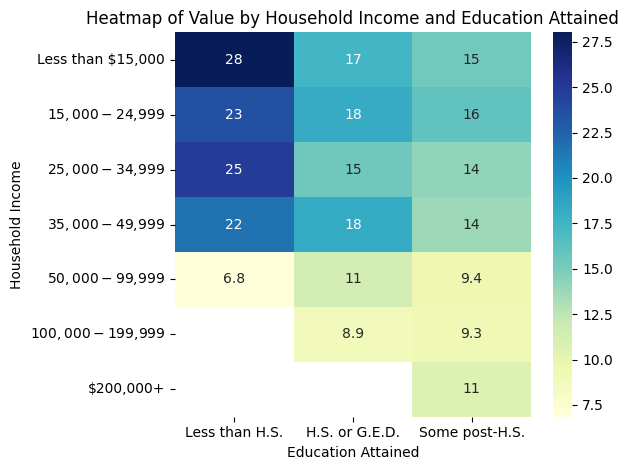

In [83]:
sns.heatmap(table,annot=True,cmap='YlGnBu')
plt.xlabel('Education Attained')
plt.ylabel('Household Income')
plt.title('Heatmap of Value by Household Income and Education Attained')
plt.tight_layout()
plt.show()

In [84]:
edu_df=df[((df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday'))]
edu_df[edu_df['Topic']=='Smokeless Tobacco'].groupby(['Year','Education Attained']).agg('mean').reset_index()

C:\Users\aravi\AppData\Local\Temp\ipykernel_5632\2128499512.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edu_df[edu_df['Topic']=='Smokeless Tobacco'].groupby(['Year','Education Attained']).agg('mean').reset_index()


,Year,Education Attained,Sample_Size,Data_value,Confidence_limit_Low,Confidence_limit_High
0,2013,Less than H.S.,114.000000,3.733333,2.533333,5.000000
1,2013,H.S. or G.E.D.,158.125000,4.550000,3.612500,5.525000
2,2013,Some post-H.S.,146.714286,3.257143,2.500000,4.028571
3,2013,Overall,207.862385,4.202752,3.415596,4.989908
4,2014,Less than H.S.,NaN,NaN,NaN,NaN
5,2014,H.S. or G.E.D.,140.222222,4.944444,3.888889,5.977778
6,2014,Some post-H.S.,145.333333,3.666667,2.900000,4.500000
7,2014,Overall,191.397959,3.928571,3.157143,4.703061
8,2015,Less than H.S.,111.500000,4.650000,3.450000,5.850000
9,2015,H.S. or G.E.D.,147.857143,4.657143,3.671429,5.642857


C:\Users\aravi\AppData\Local\Temp\ipykernel_5632\2291241845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Latitude']=[point[0] for point in ndf['GeoLocation']]
C:\Users\aravi\AppData\Local\Temp\ipykernel_5632\2291241845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Longitude']=[point[1] for point in ndf['GeoLocation']]


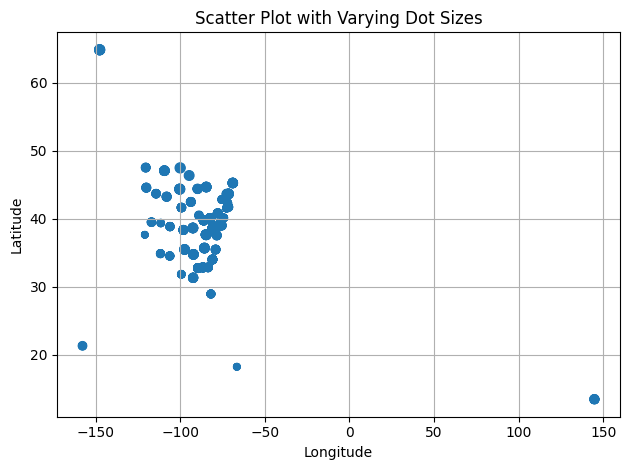

In [120]:
ndf=df[((df['Response']=='Yes')|(df['Response']=='Every day')|(df['Response']=='Smoke everyday'))]
ndf['Latitude']=[point[0] for point in ndf['GeoLocation']]
ndf['Longitude']=[point[1] for point in ndf['GeoLocation']]

plt.scatter( ndf['Longitude'],ndf['Latitude'], s=ndf['Data_value'], alpha=1)  # 's' parameter controls the size of dots
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Varying Dot Sizes')
plt.grid(True)

plt.tight_layout()
plt.show()
